Predict the number of passengers in units of 1000.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import RootMeanSquaredError


2023-06-24 22:54:09.918746: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df=pd.read_csv('./airline-passengers.csv')

In [3]:
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

([<matplotlib.axis.XTick at 0x164606a10>,
 [Text(0, 0, '1949-01'),
  Text(5, 0, '1949-06'),
  Text(10, 0, '1949-11'),
  Text(15, 0, '1950-04'),
  Text(20, 0, '1950-09'),
  Text(25, 0, '1951-02'),
  Text(30, 0, '1951-07'),
  Text(35, 0, '1951-12'),
  Text(40, 0, '1952-05'),
  Text(45, 0, '1952-10'),
  Text(50, 0, '1953-03'),
  Text(55, 0, '1953-08'),
  Text(60, 0, '1954-01'),
  Text(65, 0, '1954-06'),
  Text(70, 0, '1954-11'),
  Text(75, 0, '1955-04'),
  Text(80, 0, '1955-09'),
  Text(85, 0, '1956-02'),
  Text(90, 0, '1956-07'),
  Text(95, 0, '1956-12'),
  Text(100, 0, '1957-05'),
  Text(105, 0, '1957-10'),
  Text(110, 0, '1958-03'),
  Text(115, 0, '1958-08'),
  Text(120, 0, '1959-01'),
  Text(125, 0, '1959-06'),
  Text(130, 0, '1959-11'),
  Text(135, 0, '1960-04'),
  Text(140, 0, '1960-09')])

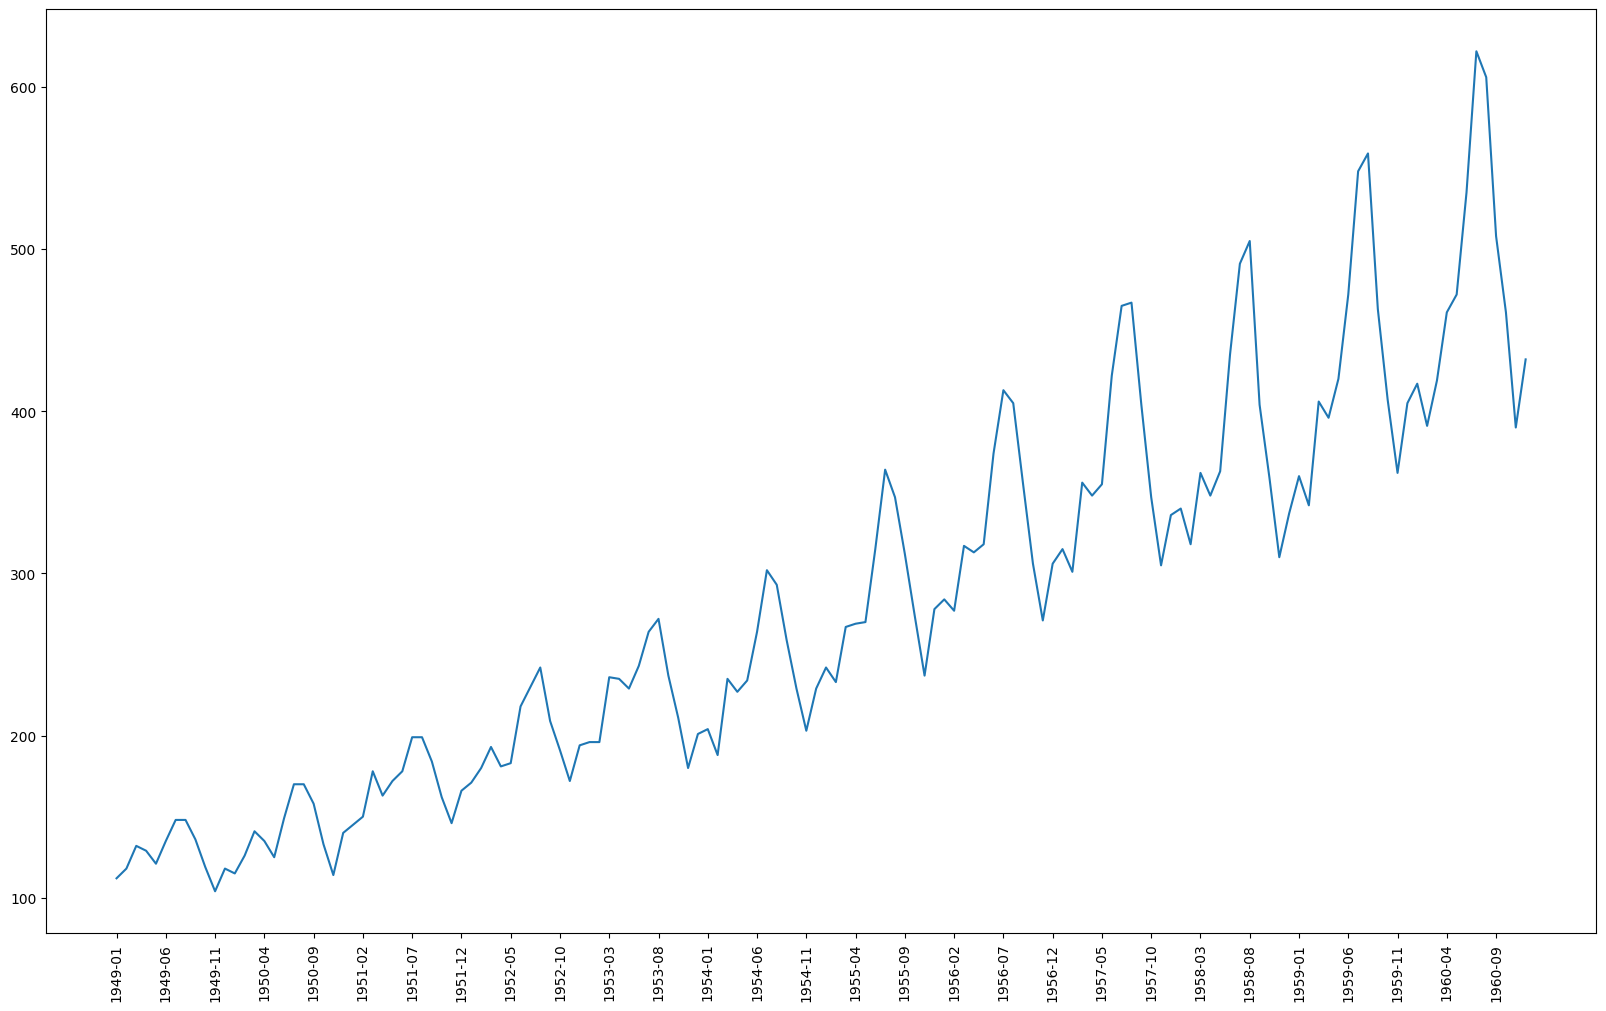

In [5]:
plt.figure(figsize=(20,12))
plt.plot(df['Month'],df['Passengers'])
plt.xticks(np.arange(0, len(df)+1, 5), rotation=90) # the x_tick and lable are illustrated every 5 data points  


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


Set a random number seed to ensure your results are reproducible.

In [7]:
tf.random.set_seed(9)

convert intiger to floating number (as NN works better with floating numbers)

In [8]:
data=df['Passengers'].values
data=data.astype('float32')

split it into train and test.

In [9]:
train_size=int(len(data)*0.7)
train, test=data[0:train_size], data[train_size:]
print(len(train), len(test), len(data))

100 44 144


Scale the data

In [10]:
scaler1=MinMaxScaler(feature_range=(0,1))
train_scaled=scaler1.fit_transform(train.reshape(-1, 1))
scaler2=MinMaxScaler(feature_range=(0,1))
test_scaled=scaler2.fit_transform(test.reshape(-1, 1))

np.min(train_scaled), np.max(train_scaled), np.min(test_scaled), np.max(test_scaled)

(0.0, 1.0000001, 0.0, 0.99999994)

create a dataset where X is the number of passengers at a given time (t), and Y is the number of passengers at the next time (t + 1).



In [11]:
def dataset_generat(data,look_back=1):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        d1 = data[i]
        dataX.append(d1)
        dataY.append(data[i + look_back])
    return np.array(dataX), np.array(dataY)

In [12]:
look_back = 1
X_train, y_train = dataset_generat(train_scaled, look_back)
X_test, y_test = dataset_generat(test_scaled, look_back)

In [13]:
X_test.shape,X_train.shape

((42, 1), (98, 1))

(X) to be in the form of [samples, time steps, features].

In [14]:
X_train_reform=np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reform=np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_test_reform.shape

(42, 1, 1)

Model

In [15]:
model=Sequential()
model.add(LSTM(4,input_shape=(1,1))) # 4 neurons or blocks, input_shape=(time_step, number_features)
model.add(Dense(1, activation='sigmoid')) # one output
model.compile(loss='mean_squared_error', optimizer='adam',metrics=[RootMeanSquaredError()])
model.fit(X_train_reform,y_train, epochs=100, batch_size=1)

Epoch 1/100


2023-06-24 22:54:15.402328: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-24 22:54:15.403522: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-24 22:54:15.404939: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

98/98 [==============================] - 1s 1ms/step - loss: 0.0712 - root_mean_squared_error: 0.2668
Epoch 2/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0678 - root_mean_squared_error: 0.2603
Epoch 3/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0652 - root_mean_squared_error: 0.2554
Epoch 4/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0630 - root_mean_squared_error: 0.2510
Epoch 5/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0612 - root_mean_squared_error: 0.2473
Epoch 6/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0596 - root_mean_squared_error: 0.2441
Epoch 7/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0582 - root_mean_squared_error: 0.2413
Epoch 8/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0569 - root_mean_squared_error: 0.2386
Epoch 9/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0558 - root_mean_squared_

Prediction

In [16]:
trainPredict = model.predict(X_train_reform)
testPredict = model.predict(X_test_reform)
# invert predictions
trainPredict = scaler1.inverse_transform(trainPredict)
trainY = scaler1.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train to be 2-dimensional
testPredict = scaler2.inverse_transform(testPredict)
testY = scaler2.inverse_transform(y_test.reshape(-1, 1)) 
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % trainScore)
testScore = np.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % testScore)

4/4 [==============================] - 0s 2ms/step


2023-06-24 22:54:27.789716: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-24 22:54:27.791547: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-24 22:54:27.792937: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2/2 [==============================] - 0s 2ms/step
Train Score: 24.09 RMSE
Test Score: 48.22 RMSE


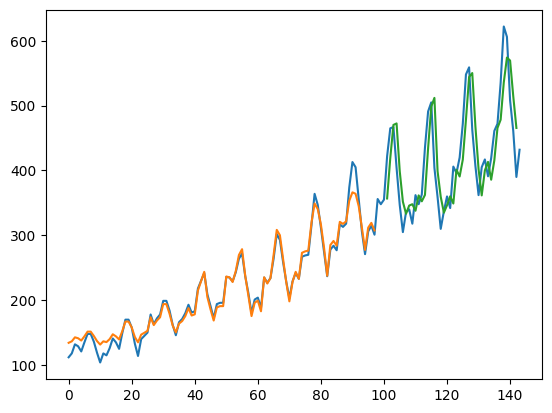

In [17]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:look_back+len(trainPredict)] = np.reshape(trainPredict[:], (len(trainPredict,)))
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1] = np.reshape(testPredict[:], (len(testPredict,)))
# plot baseline and predictions
plt.plot(data)
plt.plot(trainPredict)
plt.plot(testPredictPlot)
plt.show()
